In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as patches

Path = mpath.Path

### -OPERACOES MATEMATICAS/-



In [16]:
# Soma de vetores
def somaVetor(vet1, vet2):
    return tuple(map(lambda a,b: a+b, vet1,vet2))

print (somaVetor([800,9],[1,1]))

(801, 10)


In [17]:
#Vetor por escalar
def prodPorEscalar(vet1, fat):
    return tuple(map(lambda a: a*fat, vet1))

print (prodPorEscalar([4,12],3))

(12, 36)


In [18]:
#Equação Vetorial da Reta
vetReta = lambda p, t: lambda u: somaVetor(p, prodPorEscalar(t,u))

vetReta((0, 0.8), (0.2, 0.8))(1)
vetReta((0,0.8),(-1,0))(0)
    

(0, 0.8)

### -/OPERACOES MATEMATICAS-

In [22]:
pontos = []
### DEFINIÇÃO DOS PONTOS DE CURVAS E RETAS.
#######A ORDEM ESTA DESCRITA NA IMAGEM!!!

#Parachoque-Traseiro, Baixo - Curva #1
C1_0x = 0.0; C1_0y = 0.4;
C1_1x = -0.45; C1_1y = 0.6;
C1_2x = -0.5; C1_2y = 0.7;
#1


r2 = vetReta((C1_2x, C1_2y), (-0.01, 0.1)) #ParaChoque traseiro #2
r3 = vetReta(r2(1), (0.04, 0.05)) #Farol traseiro #3
r4 = vetReta(r3(1), (.05,0.3)) #Farol traseiro #4
r5 = vetReta(r4(1), (-.04, 0.1)) #Acima do farol #5


#Base do Aerofólio #6
C6_0x = r5(1)[0]; C6_0y = r5(1)[1];
C6_1x = C6_0x+0.23; C6_1y = C6_0y-0.06;
C6_2x = C6_1x+0.23; C6_2y = C6_1y+0.06;
#6

#Teto-Lateral - Curva #7
C7_0x = C6_2x; C7_0y = C6_2y;
C7_1x = C7_0x+1; C7_1y = C7_0y+0.4;
C7_2x = C7_1x+.5; C7_2y = C7_1y-0.6;
#7


r8 = vetReta((C7_2x, C7_2y), (0.8,0)) #Capô #8


#Capo-Farol Dianterio - Curva #9
C9_0x = r8(1)[0]; C9_0y = r8(1)[1];
C9_1x = C9_0x+1; C9_1y = C9_0y-0.1;
C9_2x = C9_1x+.3; C9_2y = C9_1y-0.5;
#9

#Parachoque Dianteiro - Curva #10 
C10_0x = C9_2x; C10_0y = C9_2y;
C10_1x = C10_0x-.1; C10_1y = C10_0y-.001;
C10_2x = C10_1x; C10_2y = C10_1y-.15;
#10



r11 = vetReta((C10_2x, C10_2y), (0.1, -.1))  #Parachoque Dianteiro #11

r12 = vetReta((r11(1)[0], r11(1)[1]), (-0.05, -0.05)) #Parachoque Dianteiro #12

r13 = vetReta((r12(1)[0], r12(1)[1]), (-0.5, -0.01)) #Parachoque Dianteiro #13



#Paralama dianteiro - Curva (Cúbica) #14
C14_0x = r13(1)[0]; C14_0y = r13(1)[1];
C14_1x = C14_0x; C14_1y = C14_0y+0.8;
C14_2x = C14_0x-0.8; C14_2y = C14_0y+0.8;
C14_3x = C14_0x-0.8; C14_3y = C14_0y;
#14



### DEFINIÇÃO DOS PONTOS DE CURVAS E RETAS. 



In [23]:
### DEFINICAO DAS RETAS


pontos = [r2,r3,r4,r5,r8,r11, r12, r13]

def retasIntervaladas(pontos):
    for r in pontos:
        plt.plot([r(0)[0], r(1)[0]],
                [r(0)[1], r(1)[1]],
                color = 'r')

### DEFINIÇÃO DAS RETAS



### DEFINIÇÃO DAS CURVAS QUADRÁTICAS
verts = [(C1_0x, C1_0y), # P0
         (C1_1x, C1_1y), # P1
         (C1_2x, C1_2y), # P2
         
         (C6_0x, C6_0y), # P0
         (C6_1x, C6_1y), # P1
         (C6_2x, C6_2y), # P2
         
         (C7_0x, C7_0y), # P0
         (C7_1x, C7_1y), # P1
         (C7_2x, C7_2y), # P2
         
         (C9_0x, C9_0y), # P0
         (C9_1x, C9_1y), # P1
         (C9_2x, C9_2y), # P2
         
         (C10_0x, C10_0y), # P0
         (C10_1x, C10_1y), # P1
         (C10_2x, C10_2y), # P2
         

         ]

codes = []
for i in range(0,len(verts)):
#     print (i, end=" ")
    if (i % 3 == 0 or i == 0):
        codes.append(Path.MOVETO)
#         print("a")
    else:
        codes.append(Path.CURVE3)
#         print("b")

        



### DEFINIÇÃO DAS CURVAS CÚBICAS

cVerts = [(C14_0x, C14_0y), # P0
          (C14_1x, C14_1y), # P1
          (C14_2x, C14_2y), # P2
          (C14_3x, C14_3y)  # P3
         ]

cCodes = []
for i in range(0,len(cVerts)):
#     print (i, end=" ")
    if (i % 4 == 0 or i == 0):
        cCodes.append(Path.MOVETO)
#         print("a")
    else:
        cCodes.append(Path.CURVE4)
#         print("b")
          

cPath = Path(cVerts, cCodes)

#JUNÇÃO DE QUADRÁTICAS E CÚBICAS

verts += cVerts
codes += cCodes

          
### DEFINIÇÃO DAS CURVAS

# print(codes)

path = Path(verts, codes) # build path from vertices & command codes


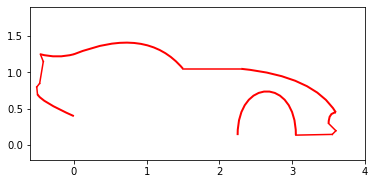

In [24]:
patch = patches.PathPatch(path, facecolor='none',
                         edgecolor='red', lw=2)


ax = plt.gca();

ax.add_patch(patch)

xs, ys = zip(*verts)

ax.set_xlim(-.6, 4)
ax.set_ylim(-.2, 1.9)
ax.set_aspect(1) # 'auto'; 'equal'; number (equal = 1)
retasIntervaladas(pontos)
plt.show()